<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->
# PHY321: Classical Mechanics 1
<!-- dom:AUTHOR: Homework 5, due Monday  February 22 -->
<!-- Author: -->  
**Homework 5, due Monday  February 22**

Date: **Feb 24, 2021**

### Practicalities about  homeworks and projects

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. Homeworks are available Wednesday/Thursday the week before the deadline. The deadline is at the Friday lecture.

3. How do I(we)  hand in?  You can hand in the paper and pencil exercises as a hand-written document. For this homework this applies to exercises 1-5. Alternatively, you can hand in everyhting (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical exercise(s) (exercise 6 here) should always be handed in as a jupyter notebook by the deadline at D2L. 

### Introduction to homework 5

This week's sets of classical pen and paper and computational
exercises are a continuation of the topics from the previous homework set. We keep dealing with simple motion problems and conservation laws; energy, momentum and angular momentum. These conservation laws are central in Physics and understanding them properly lays the foundation for understanding and analyzing more complicated physics problems.
The relevant reading background is
1. chapters 3 and 4 of Taylor (there are many good examples there) and

2. chapters 10-14 of Malthe-Sørenssen.

In both textbooks there are many nice worked out examples. Malthe-Sørenssen's text contains also several coding examples you may find useful. 

The numerical homework focuses on another motion problem where you can
use the code you developed in homework 4, almost entirely. Please take
a look at the posted solution (jupyter-notebook) for homework 4. You
need only to change the forces at play.



### Exercise 1 (15 pt), Work-energy theorem and conservation laws

This exercise was partly discussed during the lectures. You can also find it in the online notes from the week of February 15-19.
We will study a classical electron which moves in the $x$-direction along a surface. The force from the surface is

$$
\boldsymbol{F}(x)=-F_0\sin{(\frac{2\pi x}{b})}\boldsymbol{e}_x.
$$

The constant $b$ represents the distance between atoms at the surface of the material, $F_0$ is a constant and $x$ is the position of the electron.

* 1a (2pt) Is this a conservative force? And if so, what does that imply?

This is indeed a conservative force since it depends only on position and its **curl** is zero. This means that energy is conserved and the integral over the work done by the force is independent of the path taken. 
* 1b (4pt) Use the work-energy theorem to find the velocity $v(x)$. 

Using the work-energy theorem we can find the work $W$ done when moving an electron from a position $x_\
0$ to a final position $x$ through the integral

$$
W=-\int_{x_0}^x \boldsymbol{F}(x')dx' =  \int_{x_0}^x F_0\sin{(\frac{2\pi x'}{b})} dx',
$$

which results in

$$
W=\frac{F_0b}{2\pi}\left[\cos{(\frac{2\pi x}{b})}-\cos{(\frac{2\pi x_0}{b})}\right].
$$

Since this is related to the change in kinetic energy we have, with $v_0$ being the initial velocity at a  time $t_0$,

$$
v  = \pm\sqrt{\frac{2}{m}\frac{F_0b}{2\pi}\left[\cos{(\frac{2\pi x}{b})}-\cos{(\frac{2\pi x_0}{b})}\right]+v_0^2}.
$$

* 1c (4pt) With the above expression for the force, find the potential energy.

The potential energy, due to energy conservation is

$$
V(x)=V(x_0)+\frac{1}{2}mv_0^2-\frac{1}{2}mv^2,
$$

with $v$ given by the previous answer. 
We can now, in order to find a more explicit expression for the potential energy at a given value $x$, define a zero level value for the potential. The potential is defined , using the work-energy theorem , as

$$
V(x)=V(x_0)+\int_{x_0}^x (-F(x'))dx',
$$

and if you recall the definition of the indefinite integral, we can rewrite this as

$$
V(x)=\int (-F(x'))dx'+C,
$$

where $C$ is an undefined constant. The force is defined as the gradient of the potential, and in that case the undefined constant vanishes. The constant does not affect the force we derive from the potential.

We have then

$$
V(x)=V(x_0)-\int_{x_0}^x \boldsymbol{F}(x')dx',
$$

which results in

$$
V(x)=\frac{F_0b}{2\pi}\left[\cos{(\frac{2\pi x}{b})}-\cos{(\frac{2\pi x_0}{b})}\right]+V(x_0).
$$

We can now define

$$
\frac{F_0b}{2\pi}\cos{(\frac{2\pi x_0}{b})}=V(x_0),
$$

which gives

$$
V(x)=\frac{F_0b}{2\pi}\left[\cos{(\frac{2\pi x}{b})}\right].
$$

* 1d (5pt) Make a plot of the potential energy and discuss the equilibrium points where the force on the electron is zero. Discuss the physical interpretation of stable and unstable equilibrium points. Use energy conservation. 

The following Python code plots the potential

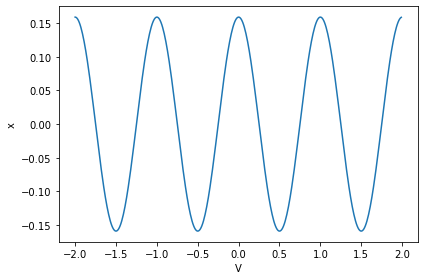

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
Deltax = 0.01
#set up arrays
xinitial = -2.0
xfinal = 2.0 
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
# Setting values for the constants. 
F0 = 1.0; b = 1.0; 
# Defining the potential
V = F0*b/(2*pi)*np.cos(2*pi*x/b)
# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x')
ax.set_xlabel('V')
ax.plot(x, V)
fig.tight_layout()
plt.show()

We have stable equilibrium  points for every minimum of the $\cos$ function and unstable equilibrium points where it has its maximimum values. At the minimum the particle has the lowest potential energy and the largest kinetic energy whereas at the maxima it has the largest potential energy and lowest kinetic energy. 

### Exsercise 2 (15pt), Rocket, Momentum and mass

Taylor exercise 3.11.    This exercise was partly discussed during the lectures, see the notes on [Energy and Momentum etc, see the part on Momentum conservation ](https://mhjensen.github.io/Physics321/doc/pub/energyconserv/html/energyconserv.html). Taylor's chapter 3.2 covers also this example.

* 3.11 a and b

Consider the rocket of mass $M$ moving with velocity $v$. After a
brief instant, the velocity of the rocket is $v+\Delta v$ and the mass
is $M-\Delta M$. Momentum conservation gives

$$
\begin{eqnarray*}
Mv&=&(M-\Delta M)(v+\Delta v)+\Delta M(v-v_e)\\
0&=&-\Delta Mv+M\Delta v+\Delta M(v-v_e),\\
0&=&M\Delta v-\Delta Mv_e.
\end{eqnarray*}
$$

In the second step we ignored the term $\Delta M\Delta v$ since we
assume it is small. The last equation gives

$$
\begin{eqnarray}
\Delta v&=&\frac{v_e}{M}\Delta M,\\
\nonumber
\frac{dv}{dt}&=&\frac{v_e}{M}\frac{dM}{dt}.
\end{eqnarray}
$$

Integrating the expression with lower limits $v_0=0$ and $M_0$, one finds

$$
\begin{eqnarray*}
v&=&v_e\int_{M_0}^M \frac{dM'}{M'}\\
v&=&v_e\ln(M/M_0)\\
&=&v_e\ln[(M_0-\alpha t)/M_0].
\end{eqnarray*}
$$

We have ignored gravity here. If we add gravity as the external force, we get when integrating an additional terms $-gt$, that is

$$
v=v_e\ln[(M_0-\alpha t)/M_0]-gt.
$$

* 3.11c

Inserting numbers $v_e=3000$ m/s, $M_0/M=2$ and $g=9.8$ m/s$^{2}$, we find $v=900$ m/s. With $g=0$ the corresponding number is $2100$ m/s, so gravity reduces the speed acquired in the first two minutes to a little less than half its weight-free value.

* 3.11d

If the thrust $\Delta Mv_e$ is less than the weight $mg$, the rocket will just sit on the ground until it has shed enough mass that the thrust can overcome the weight, definitely not a good design. 


### Exercise 3 (10pt), More Rockets

Taylor exercises 3.13 (5pt) and 3.14 (5pt). This is a continuation of the previous exercise and most of the relevant background material can be found in Taylor chapter 3.2. 

Taking the velocity from the previous exercise and integrating over time we find the height

$$
y(t) = y(t_0=0)+\int_0^tv(t')dt',
$$

which gives

$$
y(t) = v_et\ln{M_0}-v_e\int_0^t \ln{M(t')}dt'-\frac{1}{2}gt^2.
$$

To do the integral over time we recall that $M(t')=M_0-\Delta M t'$. We assumed that $\Delta M=k$ is a constant. We obtain then that the integral gives

$$
\int_0^t \ln{M(t')}dt' = \frac{1}{k}\left(M_0\ln{M_0}-M\ln{M}\right)-t,
$$

where we used that $M_0-M=kt$. We have assumed that mass decreases by a constant $k$ times time $t$.
Inserting into $y(t)$ we obtain then

$$
y(t) = v_et-\frac{1}{2}gt^2-\frac{mv_e}{k}\ln{(\frac{M_0}{M})}.
$$

Using the numbers from the previous exercise with $t=2$ min we obtain that $y\approx 40$ km.

For exercise 3.14 (5pt) we have the equation of motion which reads $Ma=kv_e-bv$ or

$$
\frac{Mdv}{kv_e-bv}=dt.
$$

We have that $dM/dt =-k$ (assumed a constant rate for mass change). We can then replace $dt$ by $-dM/k$ and we have

$$
\frac{kdv}{kv_e-bv}=-\frac{dM}{M}.
$$

Integrating gives

$$
v = \frac{kv_e}{b}\left[1-(\frac{M}{M_0})^{b/k}\right].
$$

### Exercise 4 (10pt), Center of mass

Taylor exercise 3.20. Here Taylor's chapter 3.3 can be of use. This relation will turn out to be very useful when we discuss systems of many classical particles.

The definition of the center of mass for $N$ objects can be written as

$$
M\boldsymbol{R}=\sum_{i=1}^Nm_i\boldsymbol{r}_i,
$$

where $m_i$ and $\boldsymbol{r}_i$ are the masses and positions of object $i$, respectively.

Assume now that we have a collection of $N_1$ objects with masses $m_{1i}$ and positions $\boldsymbol{r}_{1i}$
with $i=1,\dots,N_1$ and  a collection of $N_2$ objects with masses $m_{2j}$ and positions $\boldsymbol{r}_{2j}$
with $j=1,\dots,N_2$.

The total mass of the two-body system is $M=M_1+M_2=\sum_{i=1}^{N_1}m_{1i}+\sum_{j=1}^{N_2}m_{2j}$. The center of mass position $\boldsymbol{R}$ of the whole system satisfies then

$$
M\boldsymbol{R}=\sum_{i=1}^{N_1}m_{1i}\boldsymbol{r}_{1i}+\sum_{j=1}^{N_2}m_{2j}\boldsymbol{r}_{2j}=M_1\boldsymbol{R}_1+M_2\boldsymbol{R}_2,
$$

where $\boldsymbol{R}_1$ and $\boldsymbol{R}_2$ are the the center of mass positions of the two separate bodies and the second equality follows from our rewritten definition of the center of mass applied to each body separately. This is the required result.



### Exercise 5 (10pt) and 6 (40pt)

### Answers

We start with a simpler case first, the Earth-Sun system  in two dimensions only.  The gravitational force $F_G$ on the earth from the sun is

$$
\boldsymbol{F}_G=-\frac{GM_{\odot}M_E}{r^3}\boldsymbol{r},
$$

where $G$ is the gravitational constant,

$$
M_E=6\times 10^{24}\mathrm{Kg},
$$

the mass of Earth,

$$
M_{\odot}=2\times 10^{30}\mathrm{Kg},
$$

the mass of the Sun and

$$
r=1.5\times 10^{11}\mathrm{m},
$$

is the distance between Earth and the Sun. The latter defines what we call an astronomical unit **AU**.
From Newton's second law we have then for the $x$ direction

$$
\frac{d^2x}{dt^2}=-\frac{F_{x}}{M_E},
$$

and

$$
\frac{d^2y}{dt^2}=-\frac{F_{y}}{M_E},
$$

for the $y$ direction.

Here we will use  that  $x=r\cos{(\theta)}$, $y=r\sin{(\theta)}$ and

$$
r = \sqrt{x^2+y^2}.
$$

We can rewrite these equations

$$
F_{x}=-\frac{GM_{\odot}M_E}{r^2}\cos{(\theta)}=-\frac{GM_{\odot}M_E}{r^3}x,
$$

and

$$
F_{y}=-\frac{GM_{\odot}M_E}{r^2}\sin{(\theta)}=-\frac{GM_{\odot}M_E}{r^3}y,
$$

as four first-order coupled differential equations

$$
\frac{dv_x}{dt}=-\frac{GM_{\odot}}{r^3}x,
$$

and

$$
\frac{dx}{dt}=v_x,
$$

and

$$
\frac{dv_y}{dt}=-\frac{GM_{\odot}}{r^3}y,
$$

and

$$
\frac{dy}{dt}=v_y.
$$

The four coupled differential equations

$$
\frac{dv_x}{dt}=-\frac{GM_{\odot}}{r^3}x,
$$

and

$$
\frac{dx}{dt}=v_x,
$$

and

$$
\frac{dv_y}{dt}=-\frac{GM_{\odot}}{r^3}y,
$$

and

$$
\frac{dy}{dt}=v_y,
$$

can be turned into dimensionless equations or we can introduce astronomical units with $1$ AU = $1.5\times 10^{11}$. 

Using the equations from circular motion (with $r =1\mathrm{AU}$)

$$
\frac{M_E v^2}{r} = F = \frac{GM_{\odot}M_E}{r^2},
$$

we have

$$
GM_{\odot}=v^2r,
$$

and using that the velocity of Earth (assuming circular motion) is
$v = 2\pi r/\mathrm{yr}=2\pi\mathrm{AU}/\mathrm{yr}$, we have

$$
GM_{\odot}= v^2r = 4\pi^2 \frac{(\mathrm{AU})^3}{\mathrm{yr}^2}.
$$

The four coupled differential equations can then be discretized using Euler's method as (with step length $h$)

$$
v_{x,i+1}=v_{x,i}-h\frac{4\pi^2}{r_i^3}x_i,
$$

and

$$
x_{i+1}=x_i+hv_{x,i},
$$

and

$$
v_{y,i+1}=v_{y,i}-h\frac{4\pi^2}{r_i^3}y_i,
$$

and

$$
y_{i+1}=y_i+hv_{y,i},
$$

The code here implements Euler's method for the Earth-Sun system using a more compact way of representing the vectors. Alternatively, you could have spelled out all the variables $v_x$, $v_y$, $x$ and $y$ as one-dimensional arrays.

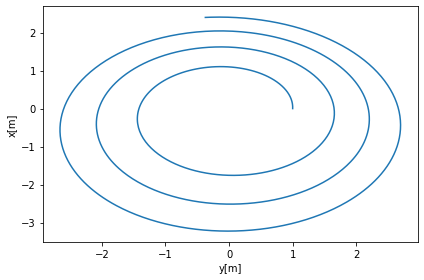

In [5]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


DeltaT = 0.01
#set up arrays 
tfinal = 10 # in years
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    r[i+1] = r[i] + DeltaT*v[i]
    t[i+1] = t[i] + DeltaT
# Plot position as function of time    
fig, ax = plt.subplots()
#ax.set_xlim(0, tfinal)
ax.set_ylabel('x[m]')
ax.set_xlabel('y[m]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
save_fig("EarthSunEuler")
plt.show()

We notice here that Euler's method doesn't give a stable orbit with for example $\Delta t =0.01$. It
means that we cannot trust Euler's method. Euler's method does not conserve energy. It is an
example of an integrator which is not
[symplectic](https://en.wikipedia.org/wiki/Symplectic_integrator).

Here we present thus two methods, which with simple changes allow us
to avoid these pitfalls. The simplest possible extension is the
so-called Euler-Cromer method.  The changes we need to make to our
code are indeed marginal here.  We need simply to replace

In [ ]:
    r[i+1] = r[i] + DeltaT*v[i]

in the above code with the velocity at the new time $t_{i+1}$

In [ ]:
    r[i+1] = r[i] + DeltaT*v[i+1]

By this simple caveat we get stable orbits.  Below we derive the
Euler-Cromer method as well as one of the most utlized algorithms for
solving the above type of problems, the so-called Velocity-Verlet
method.


Let us repeat Euler's method.
We have a differential equation

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
  y'(t_i)=f(t_i,y_i)   
\label{_auto1} \tag{1}
\end{equation}
$$

and if we truncate at the first derivative, we have from the Taylor expansion

<!-- Equation labels as ordinary links -->
<div id="eq:euler"></div>

$$
\begin{equation}
   y_{i+1}=y(t_i) + (\Delta t) f(t_i,y_i) + O(\Delta t^2), \label{eq:euler} \tag{2}
\end{equation}
$$

which when complemented with $t_{i+1}=t_i+\Delta t$ forms
the algorithm for the well-known Euler method. 
Note that at every step we make an approximation error
of the order of $O(\Delta t^2)$, however the total error is the sum over all
steps $N=(b-a)/(\Delta t)$ for $t\in [a,b]$, yielding thus a global error which goes like
$NO(\Delta t^2)\approx O(\Delta t)$. 

To make Euler's method more precise we can obviously
decrease $\Delta t$ (increase $N$), but this can lead to loss of numerical precision.
Euler's method is not recommended for precision calculation,
although it is handy to use in order to get a first
view on how a solution may look like.

Euler's method is asymmetric in time, since it uses information about the derivative at the beginning
of the time interval. This means that we evaluate the position at $y_1$ using the velocity
at $v_0$. A simple variation is to determine $x_{n+1}$ using the velocity at
$v_{n+1}$, that is (in a slightly more generalized form)

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
   y_{n+1}=y_{n}+ v_{n+1}+O(\Delta t^2)
\label{_auto2} \tag{3}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
   v_{n+1}=v_{n}+(\Delta t) a_{n}+O(\Delta t^2).
\label{_auto3} \tag{4}
\end{equation}
$$

The acceleration $a_n$ is a function of $a_n(y_n, v_n, t_n)$ and needs to be evaluated
as well. This is the Euler-Cromer method. It is easy to change the above code and see that with the same 
time step we get stable results.


Let us stay with $x$ (position) and $v$ (velocity) as the quantities we are interested in.

We have the Taylor expansion for the position given by

$$
x_{i+1} = x_i+(\Delta t)v_i+\frac{(\Delta t)^2}{2}a_i+O((\Delta t)^3).
$$

The corresponding expansion for the velocity is

$$
v_{i+1} = v_i+(\Delta t)a_i+\frac{(\Delta t)^2}{2}v^{(2)}_i+O((\Delta t)^3).
$$

Via Newton's second law we have normally an analytical expression for the derivative of the velocity, namely

$$
a_i= \frac{d^2 x}{dt^2}\vert_{i}=\frac{d v}{dt}\vert_{i}= \frac{F(x_i,v_i,t_i)}{m}.
$$

If we add to this the corresponding expansion for the derivative of the velocity

$$
v^{(1)}_{i+1} = a_{i+1}= a_i+(\Delta t)v^{(2)}_i+O((\Delta t)^2)=a_i+(\Delta t)v^{(2)}_i+O((\Delta t)^2),
$$

and retain only terms up to the second derivative of the velocity since our error goes as $O(h^3)$, we have

$$
(\Delta t)v^{(2)}_i\approx a_{i+1}-a_i.
$$

We can then rewrite the Taylor expansion for the velocity as

$$
v_{i+1} = v_i+\frac{(\Delta t)}{2}\left( a_{i+1}+a_{i}\right)+O((\Delta t)^3).
$$

Our final equations for the position and the velocity become then

$$
x_{i+1} = x_i+(\Delta t)v_i+\frac{(\Delta t)^2}{2}a_{i}+O((\Delta t)^3),
$$

and

$$
v_{i+1} = v_i+\frac{(\Delta t)}{2}\left(a_{i+1}+a_{i}\right)+O((\Delta t)^3).
$$

Note well that the term $a_{i+1}$ depends on the position at $x_{i+1}$. This means that you need to calculate 
the position at the updated time $t_{i+1}$ before the computing the next velocity.  Note also that the derivative of the velocity at the time
$t_i$ used in the updating of the position can be reused in the calculation of the velocity update as well. 

We can now easily add the Verlet method to our original code as

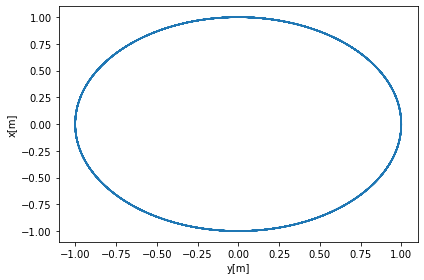

In [6]:
DeltaT = 0.01
#set up arrays 
tfinal = 10
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up forces, air resistance FD, note now that we need the norm of the vecto
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('y[m]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
save_fig("EarthSunVV")
plt.show()

You can easily generalize the calculation of the forces by defining a function
which takes in as input the various variables. We leave this as a challenge to you.

Running the above code for various time steps we see that the Velocity-Verlet is fully stable for various time steps.

We can also play around with different initial conditions in order to find the escape velocity from an orbit around the sun with distance one astronomical unit, 1 AU. The theoretical value for the escape velocity, is given by

$$
v = \sqrt{8\pi^2}{r},
$$

and with $r=1$ AU, this means that the escape velocity is $2\pi\sqrt{2}$ AU/yr. To obtain this we required that the kinetic energy of Earth equals the potential energy given by the gravitational force.

Setting

$$
\frac{1}{2}M_{\mathrm{Earth}}v^2=\frac{GM_{\odot}}{r},
$$

and with $GM_{\odot}=4\pi^2$ we obtain the above relation for the velocity. Setting an initial velocity say equal to $9$ in the above code, yields a planet (Earth) which escapes a stable orbit around the sun, as seen by running the code here.

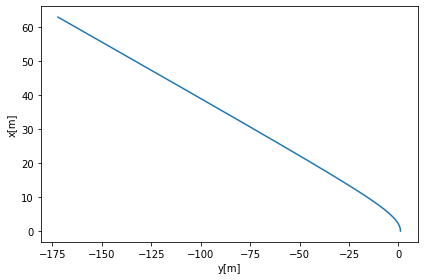

In [7]:
DeltaT = 0.01
#set up arrays 
tfinal = 100
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
# setting initial velocity larger than escape velocity
v0 = np.array([0.0,9.0])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up forces, air resistance FD, note now that we need the norm of the vecto
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('y[m]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
save_fig("EscapeEarthSunVV")
plt.show()